# Comparison of Methods to Improve Noisy Image Quality by Filtering using Median, Gaussian and Average Filters with Various Kernel Size

### Select an Image with Noise to be improved

The following image with size 256 x 256 is selected from a google search result:

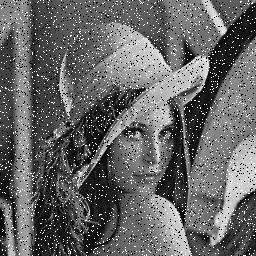






Step-by-step on applying filters to the selected image:

1. Load image
2. Convert to grayscale (using luminance 'L')
3. Create each respective filter function containing the following steps:
* Validate kernel size, force it to be odd size kernel only
* Define padding based on selected kernel size
* Move filter kernel on padded image
* Return new filtered image array value
4. Apply the filter on selected image and display results

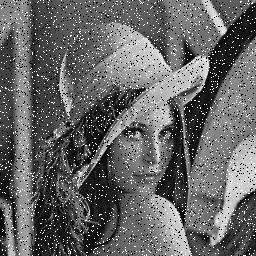

In [61]:
# Load the image
from PIL import Image

image = Image.open('selected_image.png')
display(image)

array([[139, 137, 120, ..., 139, 161, 129],
       [139, 142, 131, ..., 150, 144,  95],
       [129, 118, 140, ..., 132, 135,  94],
       ...,
       [ 42,  19,   1, ..., 255,  62,  48],
       [ 15,   0,  53, ...,  55,  70,  77],
       [ 25,  51,  34, ...,  80,  68,  53]], dtype=uint8)
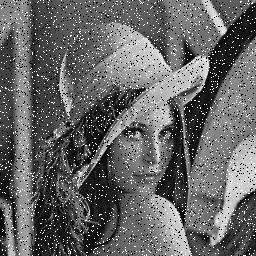

In [62]:
# Convert the image to grayscale
import numpy as np

grayscale_image = image.convert('L')
image_array = np.array(grayscale_image)
display(image_array)

In [63]:
# Force an odd kernel size to find the center pixel value
def validate_kernel_size(kernel_size):
    if kernel_size % 2 == 0:
        raise ValueError("Kernel size must be odd.")
    else:
        return kernel_size


### A. Median Filter

In [64]:
# Create median filter function

def median_filter(image_array, kernel_size):

    validate_kernel_size(kernel_size)

    # Add padding to the image
    pad_width = kernel_size // 2 # round down padding size
    padded_image = np.pad(image_array, pad_width, mode='edge') # edge mode will extend the pixel value at the border to be used by the padding pixels

    # Create an empty array for the output image
    output_image = np.zeros_like(image_array)

    # Apply the median filter on padded image
    for i in range(image_array.shape[0]): # first pass to go through the row in the height of the image, starting from row index 0 (first row)
        for j in range(image_array.shape[1]): # then go through each column within the width of the image
            # Create kernel block on padded image
            kernel_on_padded_image = padded_image[i:i+kernel_size, j:j+kernel_size]

            # Calculate the median value of the padded image
            # The median value will be used on the location of center pixel of the kernel, as new pixel value on the original image.
            output_image[i, j] = np.median(kernel_on_padded_image)

    return output_image

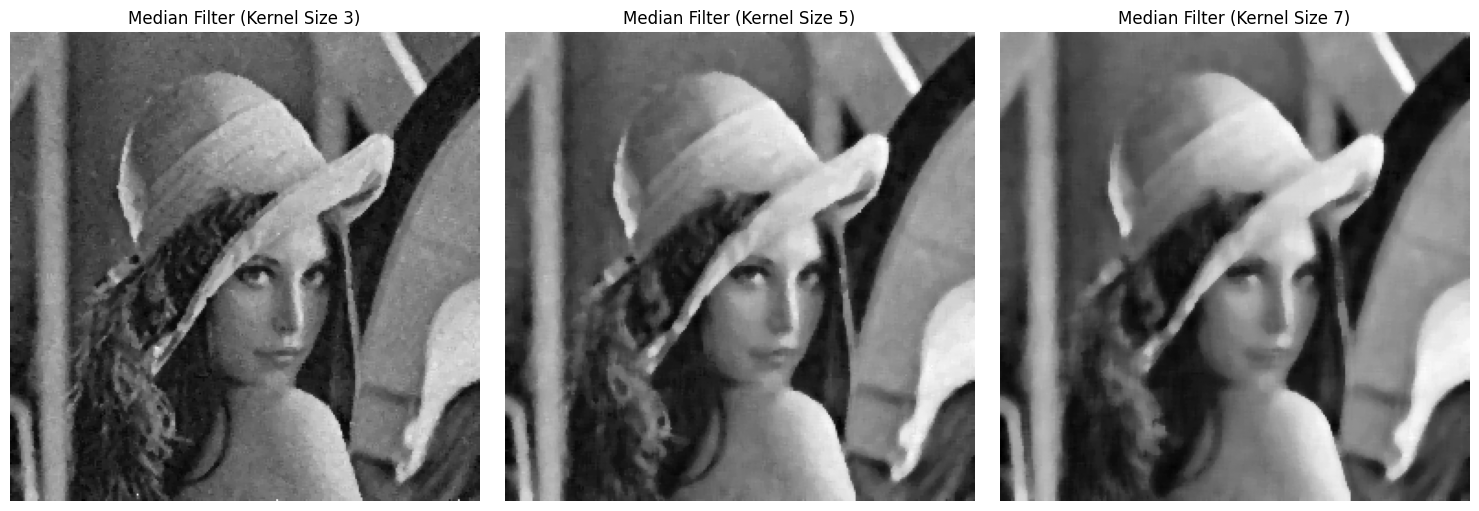

In [65]:
# Apply the median filter with different kernel sizes and display results side-by-side
import matplotlib.pyplot as plt

kernel_sizes = [3, 5, 7]
plt.figure(figsize=(15, 5))

for i, kernel_size in enumerate(kernel_sizes):
    filtered_image = median_filter(image_array, kernel_size)
    plt.subplot(1, len(kernel_sizes), i + 1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Median Filter (Kernel Size {kernel_size})')
    plt.axis('off')

plt.tight_layout()
plt.show()

### B. Gaussian Filter

In [66]:
# Create Gaussian filter function
import math

def gaussian_filter(image_array, kernel_size, sigma=1.0):

    validate_kernel_size(kernel_size)

    # Create Gaussian kernel
    kernel = np.zeros((kernel_size, kernel_size), dtype=float)
    center = kernel_size // 2
    sum_val = 0

    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - center
            y = j - center
            # Gaussian function
            kernel[i, j] = (1 / (2 * math.pi * sigma**2)) * math.exp(-(x**2 + y**2) / (2 * sigma**2))
            sum_val += kernel[i, j]

    # Normalize the kernel
    kernel /= sum_val

    pad_width = kernel_size // 2
    padded_image = np.pad(image_array, pad_width, mode='edge')
    output_image = np.zeros_like(image_array)

    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            kernel_on_padded_image = padded_image[i:i+kernel_size, j:j+kernel_size]

            # Apply the kernel (element-wise multiplication and sum)
            output_image[i, j] = np.sum(kernel_on_padded_image * kernel)

    return output_image

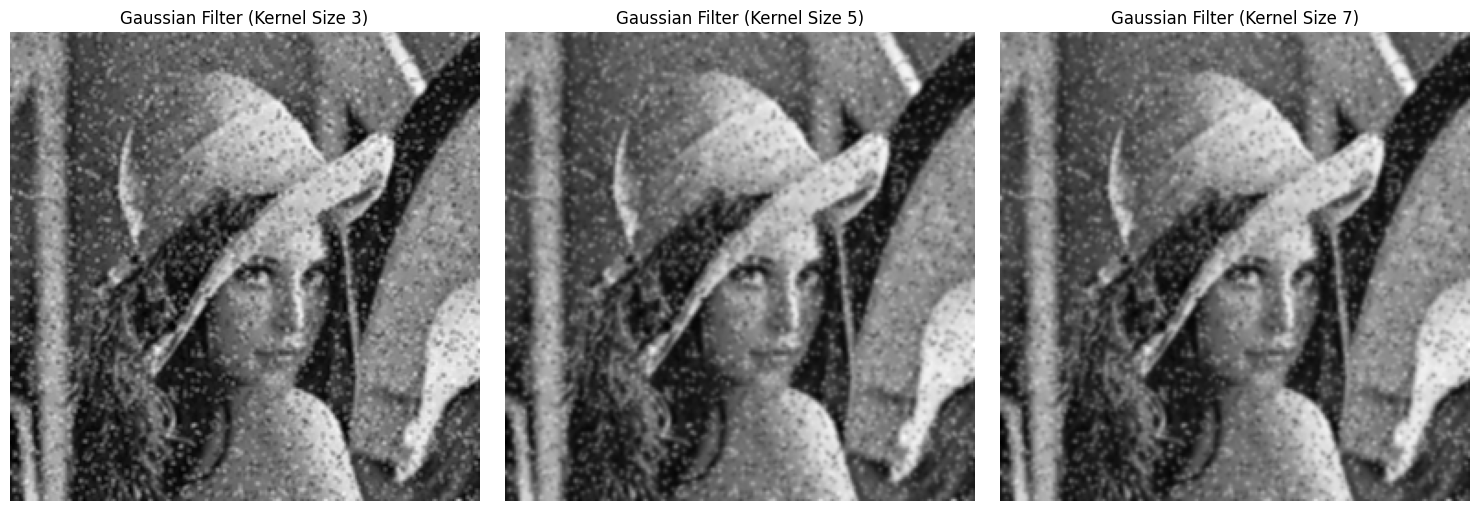

In [67]:
# Apply the gaussian filter with different kernel sizes and display results side-by-side
import matplotlib.pyplot as plt

kernel_sizes = [3, 5, 7]
plt.figure(figsize=(15, 5))

for i, kernel_size in enumerate(kernel_sizes):
    filtered_image = gaussian_filter(image_array, kernel_size)
    plt.subplot(1, len(kernel_sizes), i + 1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Gaussian Filter (Kernel Size {kernel_size})')
    plt.axis('off')

plt.tight_layout()
plt.show()

### C. Average (AVG) Filter

In [68]:
# Create average filter function
def average_filter(image_array, kernel_size):

    validate_kernel_size(kernel_size)

    pad_width = kernel_size // 2
    padded_image = np.pad(image_array, pad_width, mode='edge')
    output_image = np.zeros_like(image_array)

    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            kernel_on_padded_image = padded_image[i:i+kernel_size, j:j+kernel_size]
            output_image[i, j] = np.average(kernel_on_padded_image)

    return output_image

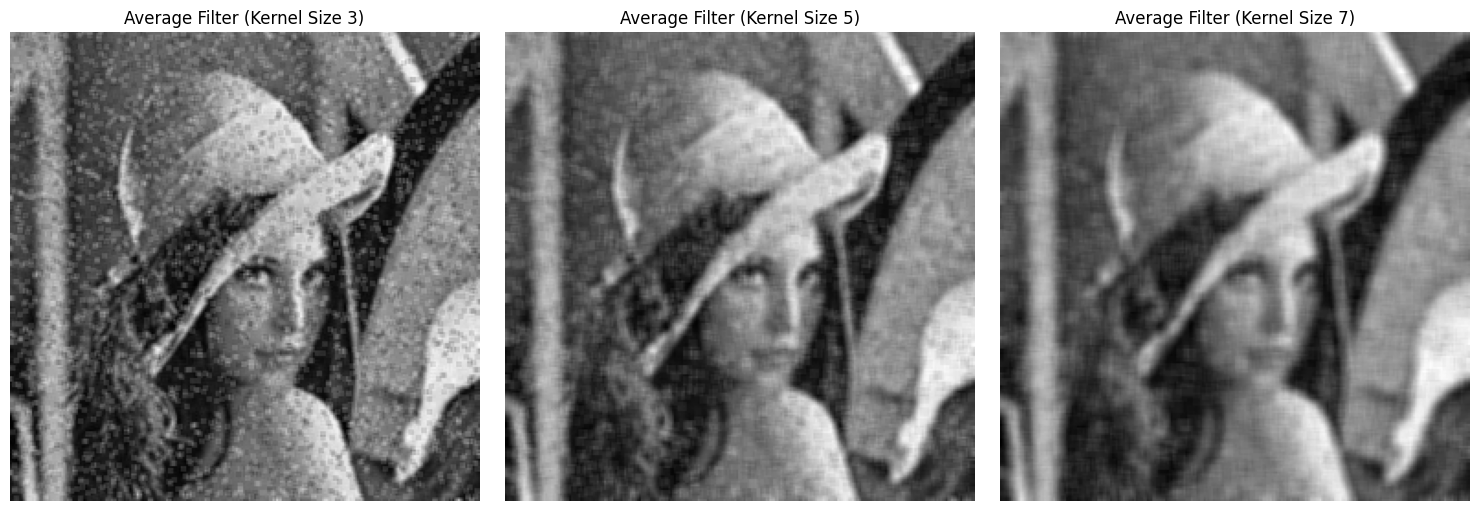

In [69]:
# Apply the average filter with different kernel sizes and display results side-by-side
import matplotlib.pyplot as plt

kernel_sizes = [3, 5, 7]
plt.figure(figsize=(15, 5))

for i, kernel_size in enumerate(kernel_sizes):
    filtered_image = average_filter(image_array, kernel_size)
    plt.subplot(1, len(kernel_sizes), i + 1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Average Filter (Kernel Size {kernel_size})')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Conclusion

Based on the visual analysis of the filtered images, the Median filter with a 3x3 kernel size appears to be the most effective among the tested kernel sizes (3x3, 5x5, and 7x7) for reducing noise in the selected image while preserving image edges. As the kernel size increased (from 3x3 to 5x5 and 7x7), the image became progressively blurrier, leading to a loss of fine details and edge definition. Therefore, for this particular noisy image, a smaller kernel size like 3x3 provides a better balance between noise removal and edge preservation when using the Median filter.